Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2 - Data Science
2nd Semester | AY 2023-2024
<hr> | <hr>
<u>**ACTIVITY NO.** | **Hands-on Activity 4.1 Advanced Data Analytics and Machine Learning**
**Name** | Reponte, Meyrazol - Valencia, Mark Janssen M.
**Section** | CPE31S5
**Date Performed**: | March 4, 2023
**Date Submitted**: | March 10, 2023
**Instructor**: | Engr. Roman M. Richard

<hr>

**Choose any dataset applicable for classification and/or prediction analysis problems.** </br>
Show the application of the following algorithms:</br>
- Linear Regression </br>
- Singular LR </br>
- Multiple LR </br>
- Polynomial LR </br>
- Logistic Regression </br>
- Decision Tree </br>
- Random Forest  </br>
Provide Evaluation reports for all models </br>

# Dataset Pre-Processing

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
import warnings
warnings.filterwarnings("ignore")

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
wineDF = pd.read_csv('/content/drive/MyDrive/CPE019PrelimExam/winequality-white.csv', delimiter = ';')

- Importing the selected dataset about the quality of white wines and assigning it to the variable wineDF, using delimiter to seperate the values in the dataset.

In [8]:
wineDF.info()
wineDF.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


- There are a total of 4998 entries in the dataset without any null or missing values.

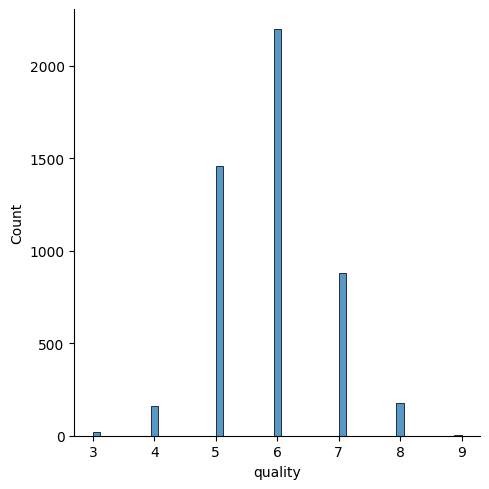

In [9]:
sns.displot(wineDF['quality'])

- Plotting the quality parameter of the datset to see the total number of each individual quality entries of the white wine. Uppon analyzing the score distribution follows the normal distribution curve having a the median at a score of "6" covering up the majority of the dataset

In [10]:
# Split the dataset into two halves
half_length = len(wineDF) // 2
winetest = wineDF.iloc[:half_length]
winetrain = wineDF.iloc[half_length:]

- The dataset is then dividen into two using indexing to select specific row. In this case the dataset is divided in half using len(wineDF) divided by two and followed by the .iloc function to select the half of the dataset. The first halves assigned for testing, and the other half is used for training the model.

In [25]:
winetest.info()
winetrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2449 entries, 0 to 2448
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         2449 non-null   float64
 1   volatile acidity      2449 non-null   float64
 2   citric acid           2449 non-null   float64
 3   residual sugar        2449 non-null   float64
 4   chlorides             2449 non-null   float64
 5   free sulfur dioxide   2449 non-null   float64
 6   total sulfur dioxide  2449 non-null   float64
 7   density               2449 non-null   float64
 8   pH                    2449 non-null   float64
 9   sulphates             2449 non-null   float64
 10  alcohol               2449 non-null   float64
 11  quality               2449 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 229.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2449 entries, 2449 to 4897
Data columns (total 12 columns):
 #   Column     

- Using the .info() function to see the number of entries in each dataset. there are now two datasets mainly wine.train and wine.test having a 2449 entries on each

In [11]:
# Defining the content of the feature_columns
feature_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                   'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                   'pH', 'sulphates', 'alcohol']

# Defining the content of the target_column
target_column = 'quality'

- I have divided the dataset into two variables having the feature_colums containing the independent variables that affect the dependent variable which is the quality assigned on the target_column.

In [12]:
# Split the winetrain dataset into features (X_train) and the new binary target variable (y_train)
x_train = winetrain[feature_columns].values
y_train = winetrain[target_column].values

# Split the winetest dataset into features (X_test) and the new binary target variable (y_test)
x_test = winetest[feature_columns].values
y_test = winetest[target_column].values

- The variables are then re-assigned again into two per dataset x_train and y_train will be used for training the model and y_test and x_test will be used to test the accuracy of the trained model. x containing the independent variables in the dataset and the x containing the quality or the dependent variable of the dataset.

# Logistic Regression

In [26]:
# Intializes the logistic regression object
logistic_model = LogisticRegression(solver='lbfgs', max_iter=1000)

- To perform a logisitc regression the logistic model from sklearn is initialized using the LogisticRegression() Function having the parameters set to solver lbfgs and the max itertaion to 1000

In [27]:
# Training the logistic regression model
logistic_model.fit(x_train , y_train)

LogisticRegression(max_iter=1000)

- The .fit() function is then used to train the logisic regression model using the data on x_train, and y_train.

In [28]:
# Predicting the output of x_test using logistic regression
y_pred = logistic_model.predict(x_test)

- the .predict() function is then used to make a predictions based on the previously trained model. the x_test is then used as the input data to generate predictions of the test dataset. the data generated is then stored on the y_pred function

In [29]:
# Creates a new dataframe for the predicted values of the model
LRpredictedFrame = pd.DataFrame({'fixed acidity': x_test[:, 0], 'volatile acidity': x_test[:, 1], 'citric acid': x_test[:, 2], 'residual sugar': x_test[:, 3],
                          'chlorides': x_test[:, 4], 'free sulfur dioxide': x_test[:, 5], 'total sulfur dioxide': x_test[:, 6], 'density': x_test[:, 7],
                          'pH': x_test[:, 8], 'sulphates': x_test[:, 9], 'alcohol': x_test[:, 10], 'quality' : y_pred})

In [30]:
LRpredictedFrame

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,5
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,5
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,5
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
2444,7.6,0.285,0.32,14.6,0.063,32.0,201.0,0.99800,3.00,0.45,9.2,5
2445,6.6,0.340,0.34,2.6,0.051,40.5,210.0,0.99314,3.15,0.61,10.0,5
2446,6.6,0.320,0.33,2.5,0.052,40.0,210.0,0.99316,3.15,0.60,10.0,5
2447,6.5,0.270,0.26,8.2,0.042,21.0,133.0,0.99612,3.43,0.64,9.8,5


- A new dataframe is then created using pandas containing the data from the x_test values. The predictions of the logistic regression model is then added to the quality column via the y_pred variable

In [31]:
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[  0   0   9   5   0   0   0]
 [  0   0  85  20   0   0   0]
 [  0   0 583 219   0   0   0]
 [  0   0 503 525   4   0   0]
 [  0   0 113 280  11   0   0]
 [  0   0  15  70   2   0   0]
 [  0   0   0   5   0   0   0]]


- The confusion matrix is used to compare the origial quality values to the generated/predicted values of the logistic regression model

In [32]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00       105
           5       0.45      0.73      0.55       802
           6       0.47      0.51      0.49      1032
           7       0.65      0.03      0.05       404
           8       0.00      0.00      0.00        87
           9       0.00      0.00      0.00         5

    accuracy                           0.46      2449
   macro avg       0.22      0.18      0.16      2449
weighted avg       0.45      0.46      0.39      2449



- The classification_report() function is then used to print out the classification report of the model. The Precision column tells the accuracy of the positibe predictions. mainly asnwering the number of true positive values. The recall column on the other hand counts the number of the matches positive values on the original and predicted values. The f1-score is the mean of both precision and recall having the best value of 1 and worst of 0. The support is the represntation of the different classes in the dataset.

In [33]:
# Calculate and print the accuracy of the model on the test set
accuracy = logistic_model.score(x_test, y_test)
print(f"Logistic Regression Model Accuracy: {accuracy*100:.2f}%")

Logistic Regression Model Accuracy: 45.69%


- The Score of the model is then printed using the .score function of sk learn using x_test and y_test. The score is then printed in percentage fromat. The logistic Regression model has a score of around 45%

In [34]:
# Plotting function.
def plot(col, ax):
    sns.regplot(x=col, y='quality', data=LRpredictedFrame, ci=None, ax=ax, label=col)

- The first function defined plot wtakes the column name and the axes object as it ax parameters. Within that function the sns.regfplot is called to make a regression plot of the said column with the column "quality" using the data from LRpredicteedFrame

In [35]:
# assign the lenght of the object
num_features = len(feature_columns)

- The total number of features on the feature_clolumns variable is counted using the len() function and stores it on the num_features

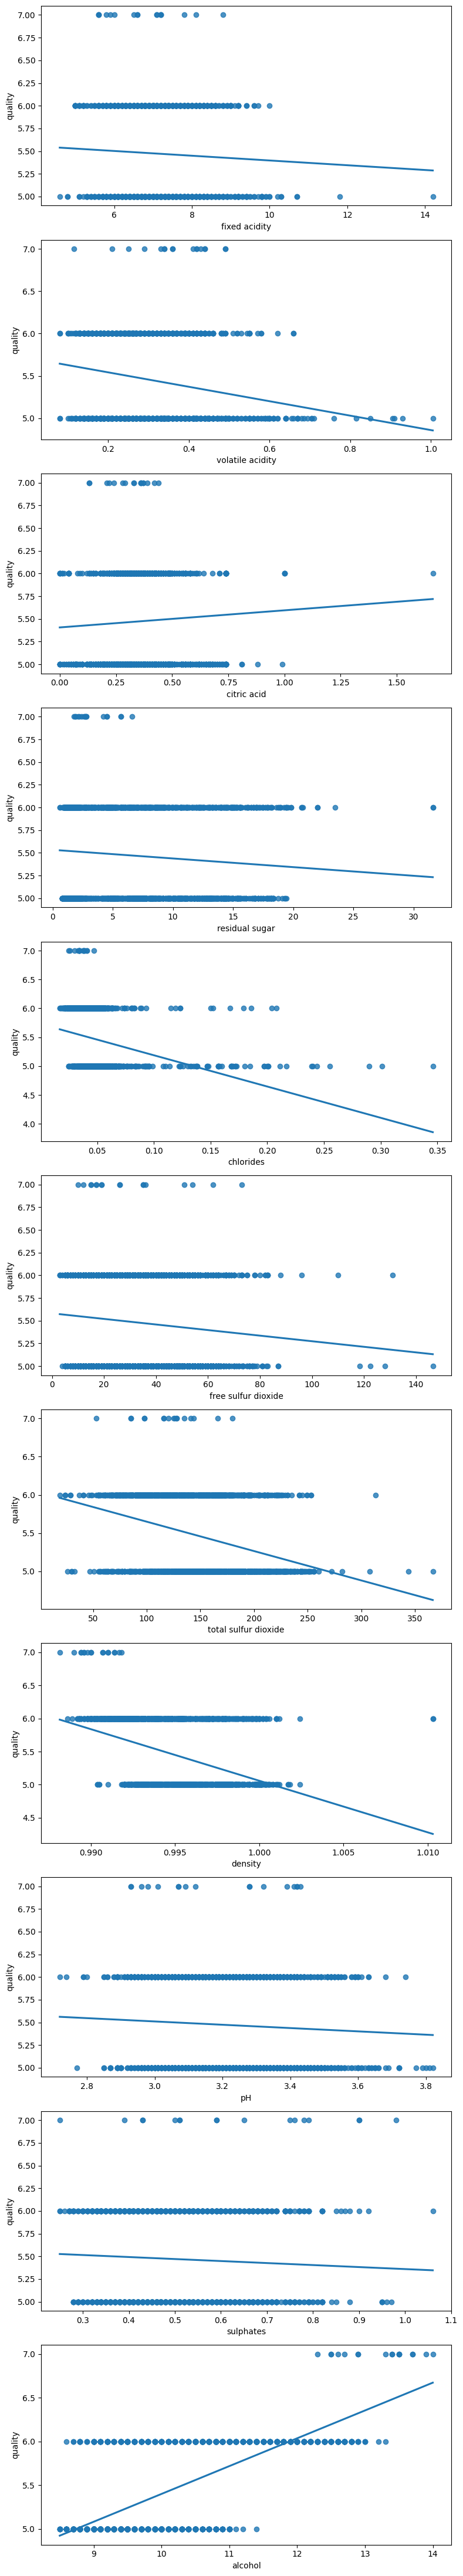

In [36]:
# The subplot grid with one column and as many rows as there are features.
fig, axes = plt.subplots(num_features, 1, figsize=(8, num_features*4))

# if there is only one feature, `axes` would not be an array.
if num_features == 1:
    axes = [axes]

# Looping statment for plotting the different plots
for col, ax in zip(feature_columns, axes):
    plot(col, ax)

plt.tight_layout()
plt.show()

- The .sublplot function from plt is used to create the grid containing the rows and columns of the fetures depending on the figsize[link text](https://)
- A for loop is then used to goes through the different pairs of the feature_columns aswell as its corresponding axes and creates a plot in each of them.
- The primary purpose of plotting the different variables to the quality is that to see the relationship of each independent variables to the dependent variable. This is how all models are trained by determining the relationship of the different variables so that it is able to predict or generate outcomes.

# Desicion Tree

In [18]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier()

- The DecisionTreeClassifier() function is used to create and use the Decision tree model. It is then stored on the variable clf

In [19]:
# Train the classifier with the training set
clf.fit(x_train, y_train)

DecisionTreeClassifier()

- The fit.function is  used to train the Decision Tree model using the x_test, and the y_train data.


In [20]:
# Predict the labels of the test set
predictions = clf.predict(x_test)

- The .predict() function is then used to make predictions using the decision tree model and uses the x_test variable to make predictions of the test dataset. The generated prediction data is then stored on the predictions function.

In [21]:
# Evaluate the classifier using confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[  1   0   3   9   1   0   0]
 [  0  19  42  36   3   5   0]
 [  1  50 387 326  33   5   0]
 [  5  31 347 509 121  19   0]
 [  4   2  83 205  98  12   0]
 [  1   0   9  37  32   8   0]
 [  0   0   0   3   2   0   0]]


- The confusion matrix using the Decision Tree Algorithim.

In [22]:
# Print the classification report
class_report = classification_report(y_test, predictions)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           3       0.08      0.07      0.08        14
           4       0.19      0.18      0.18       105
           5       0.44      0.48      0.46       802
           6       0.45      0.49      0.47      1032
           7       0.34      0.24      0.28       404
           8       0.16      0.09      0.12        87
           9       0.00      0.00      0.00         5

    accuracy                           0.42      2449
   macro avg       0.24      0.22      0.23      2449
weighted avg       0.41      0.42      0.41      2449



- The classification report of of the results generated by the decision tree algorithim.

In [23]:
# Calculate and print the accuracy of the classifier
accuracy = accuracy_score(y_test, predictions)
print(f"Decision Tree Model Accuracy: {accuracy*100:.2f}%")

Decision Tree Model Accuracy: 41.73%


- The Decision Tree model have a accuracy score of around 42%

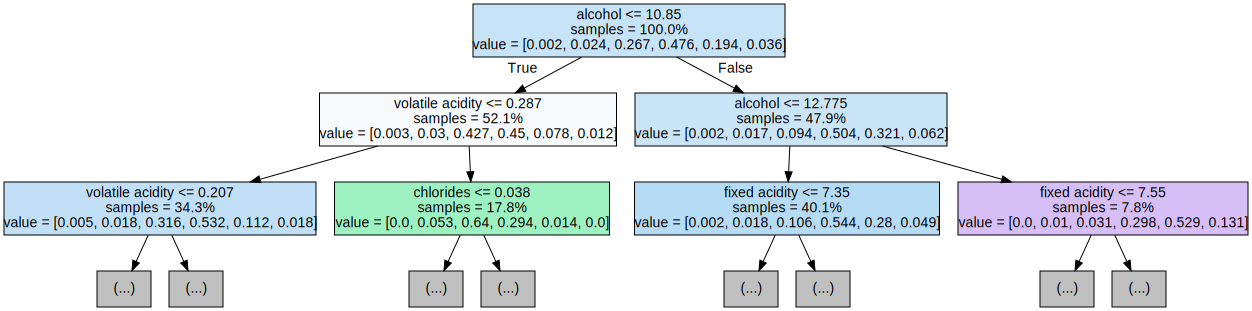

In [24]:
dot_data = export_graphviz(clf, feature_names=feature_columns, filled=True, max_depth=2, impurity=False, proportion=True)
graph = graphviz.Source(dot_data)
display(graph)

 - using the export_graphviz() function i was able to create a decision tree graph with the given paramters, clf refers to the decisiontree algorithim and followed by the feature_columns or known as the "quality" column, Filled= true inciates the majority for calssification, the max depth refers to the distance between the root nodes and the leaf node, in this case it is set to 2 which means two hops after the root node. If the max depth  impurity set to false to hide the impurity in each node  and the proportion to display the values in proportions or in percentage.

 - the .source() function is then used to call the dot_data variable that contains the results of the export_graphviz() function we previously executed.

- The graph is then displayed using the display() function


- The decision tree works by classifiying or regressing data using true or false answer to certain question. In this case going to the right of the nodes refers to false and going to the left refers to true. Having the root node set to alcohol level greater than or equal to 10.85. if so it is true the left node is then followed etc.

# Random Forest

In [13]:
# Initializing the Random Forest classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model with the training data
random_forest_model.fit(x_train, y_train)

# Predicting on the test data
y_pred = random_forest_model.predict(x_test)

# Evaluating the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculating and printing the accuracy of the model
accuracy = random_forest_model.score(x_test, y_test)
print(f"Random Forest Model Accuracy: {accuracy*100:.2f}%")

Confusion Matrix:
[[  0   0   8   6   0   0   0]
 [  0   4  75  26   0   0   0]
 [  0   2 549 249   2   0   0]
 [  0   0 379 630  23   0   0]
 [  0   0  63 297  44   0   0]
 [  0   0   7  65  15   0   0]
 [  0   0   0   3   2   0   0]]

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00        14
           4       0.67      0.04      0.07       105
           5       0.51      0.68      0.58       802
           6       0.49      0.61      0.55      1032
           7       0.51      0.11      0.18       404
           8       0.00      0.00      0.00        87
           9       0.00      0.00      0.00         5

    accuracy                           0.50      2449
   macro avg       0.31      0.21      0.20      2449
weighted avg       0.49      0.50      0.45      2449

Random Forest Model Accuracy: 50.10%


- The same process repeats again but this time the classifier used is the RandomForestClassifier() function. The model is classified then followed by the training the model using .fit() function then then predicting the values using the .predict funtion and stores it int he y_pred. The confusion matrix is printed using the confusion_matrix() function, followed by the classification report using the Classification_report() function. then lastly. The score of the model is printed using the function .score(). The Random Forest Model got a accuracy score of around 50% Accuracy.

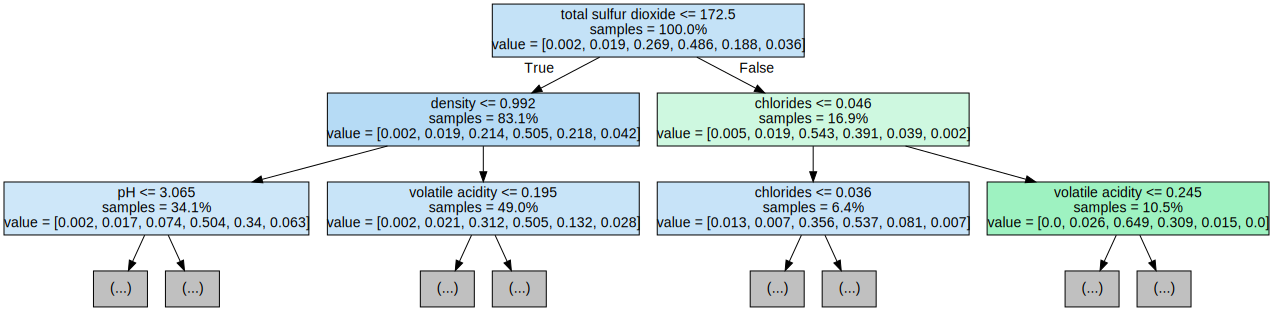

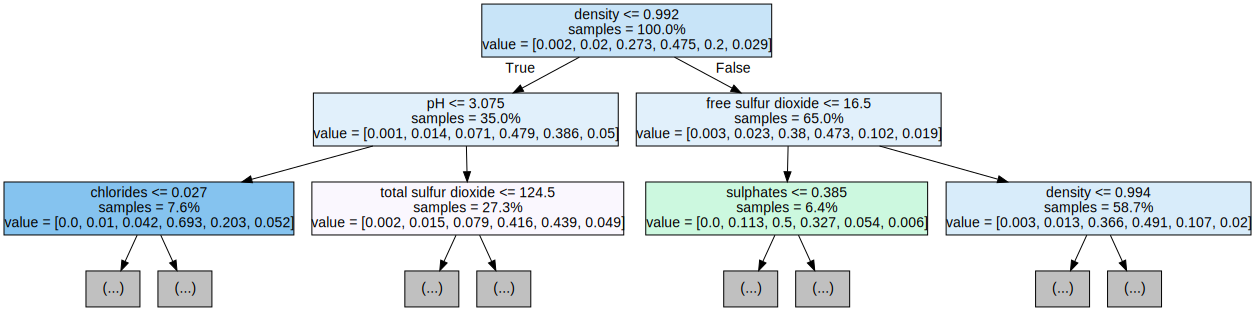

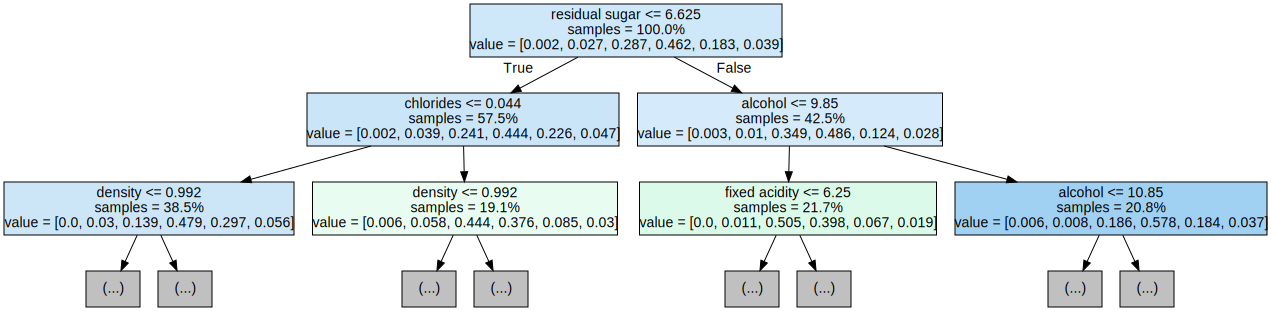

In [17]:
for i in range(3):
    tree = random_forest_model.estimators_[i]
    dot_data = export_graphviz(tree, feature_names=feature_columns, filled=True,
                              max_depth=2, impurity=False, proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

- To generate multiple desicion tree the function is then placed inside the for loop which has a parameter of 3 making it loop 3 times.

- The Random Forest Algorithim is similar to the Decision Tree Algorithim the main difference is that the Random Forest generates multiple Decision Trees that works together to make a more accurate prediction

# Summary, Lessons Learned and Conclusion




 - On this Prelim Examnianation we were able to use multiple algorithims ranging from linear regression to Decision forest to generate predictions. We were able to provide a model score accuracy for each model used. We were also able to generate plottings for each model used and was able to interpret how the model score were generated. We found this hands on activity difficult due to the fact that it needs an extensive ammount of research to execute due to the complexness of the algorithims we were not able to explain further how these models work in the mathematical side of the algotihim. But all in all we were able to execute the activity and able to provide with a Model Accuracy Score and plotting.